<h1>Exercises week 41</h1>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


n = 100
x = 2 * np.random.rand(n, 1)
y = 4 + 3 * x + 5 * x**2 + np.random.randn(n, 1) 

<h2>Gradient decent</h2>

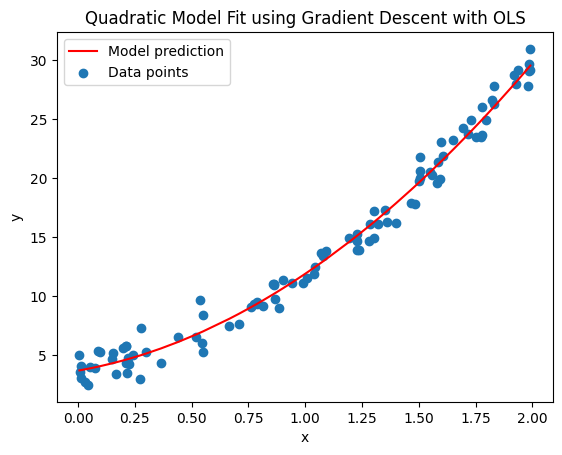

OLS Method MSE: 0.9509


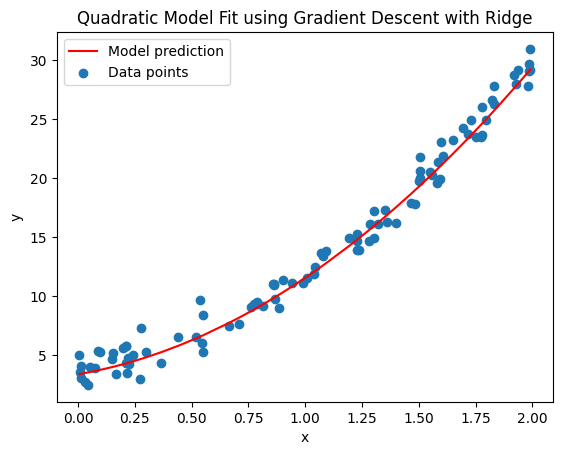

Ridge Method MSE: 1.0627


In [47]:
#sort the data
sort_index = np.argsort(x, axis=0)
x = x[sort_index].reshape(n,1)
y = y[sort_index].reshape(n,1)


#design matrix  
X = np.c_[np.ones((n,1)),x,x**2]

eta = 0.01
n_iterations = 1000

#OLS part
beta_ols = np.random.randn(3,1)

for iteration in range(n_iterations):
    gradient = 2/n*X.T @ (X @ beta_ols-y)
    beta_ols -= eta*gradient

model = X @ beta_ols

# Plot the results
plt.plot(x, model, label='Model prediction', color='red')
plt.scatter(x, y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Model Fit using Gradient Descent with OLS')
plt.legend()
plt.show()
print(f'OLS Method MSE: {mean_squared_error(y, model):.4f}')


#Ridge part
lmb = 0.1
beta_ridge = np.random.randn(3,1)

for iteration in range(n_iterations):
    gradient = 2/n*X.T @ (X @ beta_ridge-y) + 2*lmb*beta_ridge
    beta_ridge -= eta*gradient

model = X @ beta_ridge

# Plot the results
plt.plot(x, model, label='Model prediction', color='red')
plt.scatter(x, y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Model Fit using Gradient Descent with Ridge')
plt.legend()
plt.show()

print(f'Ridge Method MSE: {mean_squared_error(y, model):.4f}')


<h2>Momentum and learning rate<h2>

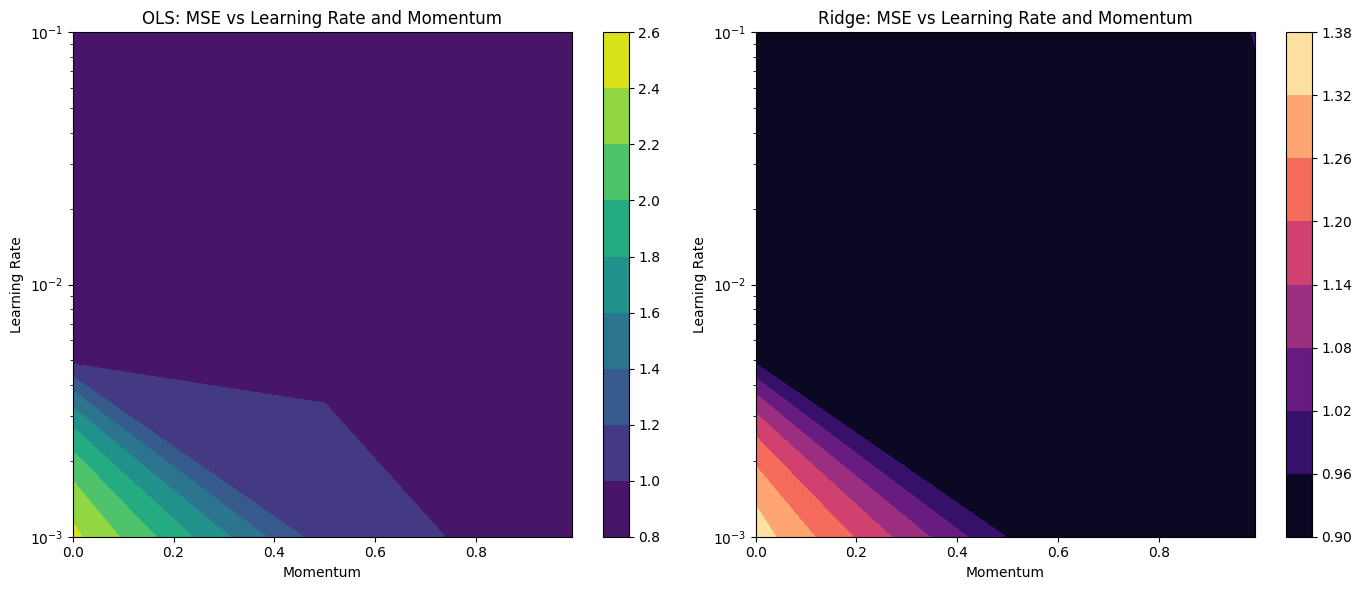

Best learning rate and momentum for OLS: (0.1, 0.95)
Best learning rate and momentum for Ridge: (0.05, 0)
Best MSE for OLS: 0.9392652049741403
Best MSE for Ridge: 0.9393019911586125


In [48]:

# Define learning rates and momentum factors to try
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
momentums = [0, 0.5, 0.9, 0.95, 0.99]

n_iterations = 1000
lmb = 0.001

# Function for gradient descent with momentum
def gradient_descent_momentum(X, y, learning_rate, momentum, ridge=False, lmb=0.0):
    beta = np.random.randn(3, 1)
    velocity = np.zeros_like(beta)
    
    for iteration in range(n_iterations):
        gradient = 2 / n * X.T @ (X @ beta - y)
        if ridge:
            gradient += 2 * lmb * beta  # Ridge penalty
        
        velocity = momentum * velocity + learning_rate * gradient
        beta -= velocity
    
    return beta

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

errors_ols = np.zeros((len(learning_rates), len(momentums)))
errors_ridge = np.zeros((len(learning_rates), len(momentums)))

# Loop over each learning rate and momentum combination
for i, lr in enumerate(learning_rates):
    for j, mom in enumerate(momentums):
        # OLS
        beta_ols = gradient_descent_momentum(X, y, lr, mom)
        y_pred_ols = X @ beta_ols
        errors_ols[i, j] = mean_squared_error(y, y_pred_ols)
        
        # Ridge
        beta_ridge = gradient_descent_momentum(X, y, lr, mom, ridge=True, lmb=lmb)
        y_pred_ridge = X @ beta_ridge
        errors_ridge[i, j] = mean_squared_error(y, y_pred_ridge)

# Create heatmaps
plt.figure(figsize=(14, 6))

# OLS Heatmap
plt.subplot(1, 2, 1)
plt.contourf(momentums,learning_rates,errors_ols, cmap='viridis')
plt.title('OLS: MSE vs Learning Rate and Momentum')
plt.xlabel('Momentum')
plt.ylabel('Learning Rate')
plt.yscale('log')
plt.colorbar()

# Ridge Heatmap
plt.subplot(1, 2, 2)
plt.contourf(momentums,learning_rates,errors_ridge,cmap='magma')
plt.title('Ridge: MSE vs Learning Rate and Momentum')
plt.xlabel('Momentum')
plt.ylabel('Learning Rate')
plt.yscale('log')
plt.colorbar()

plt.tight_layout()
plt.show()
#print the best learning rate and momentum for OLS and Ridge
print(f'Best learning rate and momentum for OLS: {learning_rates[np.unravel_index(np.argmin(errors_ols), errors_ols.shape)[0]], momentums[np.unravel_index(np.argmin(errors_ols), errors_ols.shape)[1]]}')
print(f'Best learning rate and momentum for Ridge: {learning_rates[np.unravel_index(np.argmin(errors_ridge), errors_ridge.shape)[0]], momentums[np.unravel_index(np.argmin(errors_ridge), errors_ridge.shape)[1]]}')
#print the best MSE for OLS and Ridge
print(f'Best MSE for OLS: {np.min(errors_ols)}')
print(f'Best MSE for Ridge: {np.min(errors_ridge)}')

<h2>Stochastic Gradient Decent<h2>

Tuning OLS


/var/folders/xn/3d6pw84d5vx2yxxg15gtmrj40000gn/T/ipykernel_58161/3201831458.py:17: RuntimeWarning: overflow encountered in matmul
  gradient = 2 / batch_size * Xi.T @ (Xi @ beta - yi)
/var/folders/xn/3d6pw84d5vx2yxxg15gtmrj40000gn/T/ipykernel_58161/3201831458.py:19: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - eta * gradient


Best MSE: 0.9393824487002257 with Learning rate: 0.01 and Momentum: 0.5
Best learning rate and momentum for OLS: (0.01, 0.5)
Tuning Ridge


/var/folders/xn/3d6pw84d5vx2yxxg15gtmrj40000gn/T/ipykernel_58161/3201831458.py:15: RuntimeWarning: overflow encountered in matmul
  gradient = 2 / batch_size * Xi.T @ (Xi @ beta - yi) + 2 * lambda_ridge * beta


Best MSE: 0.9414170866758738 with Learning rate: 0.001 and Momentum: 0.9
Best learning rate and momentum for Ridge: (0.001, 0.9)


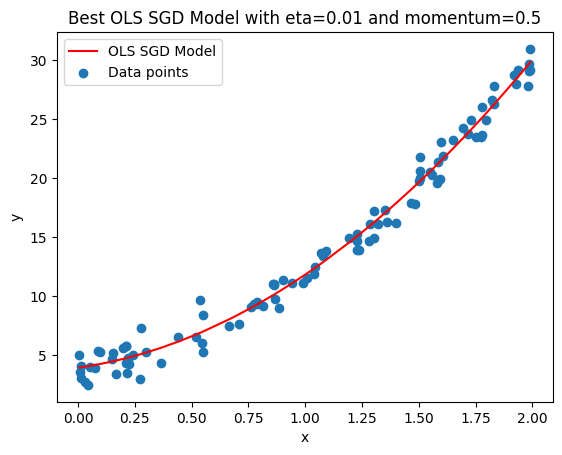

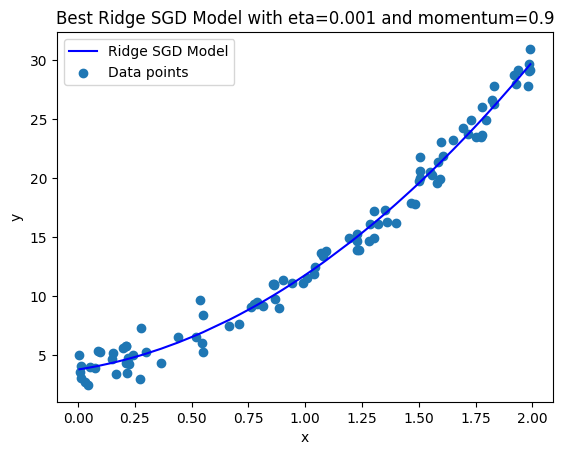

In [49]:
eta_values = [0.1, 0.01, 0.001] 
momentum_values = [0.5, 0.9, 0.99]  
n_iterations = 1000
batch_size = 10 
n_batches = n // batch_size  

def sgd(X, y, beta, eta, momentum, lambda_ridge=0, ridge=False):
    velocity = np.zeros(beta.shape)
    for iteration in range(n_iterations):
        for i in range(n_batches):
            random_index = np.random.randint(n_batches) * batch_size
            Xi = X[random_index:random_index+batch_size]
            yi = y[random_index:random_index+batch_size]
            if ridge:
                gradient = 2 / batch_size * Xi.T @ (Xi @ beta - yi) + 2 * lambda_ridge * beta
            else:
                gradient = 2 / batch_size * Xi.T @ (Xi @ beta - yi)
            
            velocity = momentum * velocity - eta * gradient
            beta += velocity

    return beta

def tune_sgd(X, y, ridge=False, lambda_ridge=0):
    best_eta = None
    best_momentum = None
    best_error = float('inf')
    
    for eta in eta_values:
        for momentum in momentum_values:
            beta_sgd = np.random.randn(3, 1)
            beta_sgd = sgd(X, y, beta_sgd, eta, momentum, lambda_ridge, ridge)
            model = X @ beta_sgd
            
            error = np.mean((model - y)**2)  
            
            if error < best_error:
                best_error = error
                best_eta = eta
                best_momentum = momentum
    print(f"Best MSE: {best_error} with Learning rate: {best_eta} and Momentum: {best_momentum}")
    return best_eta, best_momentum, best_error

# Perform tuning for OLS
print("Tuning OLS")
best_eta_ols, best_momentum_ols, best_error_ols = tune_sgd(X, y)
print(f"Best learning rate and momentum for OLS: ({best_eta_ols}, {best_momentum_ols})")

# Perform tuning for Ridge
lambda_ridge = 0.01  
print("Tuning Ridge")
best_eta_ridge, best_momentum_ridge, best_error_ridge = tune_sgd(X, y, ridge=True, lambda_ridge=lambda_ridge)
print(f"Best learning rate and momentum for Ridge: ({best_eta_ridge}, {best_momentum_ridge})")

# Now plot the results
beta_ols = np.random.randn(3, 1)
beta_ols = sgd(X, y, beta_ols, best_eta_ols, best_momentum_ols)
model_ols = X @ beta_ols

plt.plot(x, model_ols, label='OLS SGD Model', color='red')
plt.scatter(x, y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Best OLS SGD Model with eta={best_eta_ols} and momentum={best_momentum_ols}')
plt.legend()
plt.show()

beta_ridge = np.random.randn(3, 1)
beta_ridge = sgd(X, y, beta_ridge, best_eta_ridge, best_momentum_ridge, lambda_ridge=lambda_ridge, ridge=True)
model_ridge = X @ beta_ridge

plt.plot(x, model_ridge, label='Ridge SGD Model', color='blue')
plt.scatter(x, y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Best Ridge SGD Model with eta={best_eta_ridge} and momentum={best_momentum_ridge}')
plt.legend()
plt.show()

<h2>Adagrad RMSprop and Adam<h2>

In [50]:
def adagrad(X, y, beta, eta, epsilon=1e-8, momentum=0, use_momentum=False):
    velocity = np.zeros(beta.shape)
    G = np.zeros(beta.shape)
    for i in range(n_iterations):
        for j in range(n_batches):
            random_index = np.random.randint(n_batches) * batch_size
            Xi = X[random_index:random_index + batch_size]
            yi = y[random_index:random_index + batch_size]
            gradient = 2 / batch_size * Xi.T @ (Xi @ beta - yi)
            G += gradient**2
            adjusted_gradient = gradient / (np.sqrt(G) + epsilon)
            if use_momentum:
                velocity = momentum * velocity - eta * adjusted_gradient
                beta += velocity
            else:
                beta -= eta * adjusted_gradient
    return beta


In [51]:
def rmsprop(X, y, beta, eta, epsilon=1e-8, decay_rate=0.9, momentum=0, use_momentum=False):
    velocity = np.zeros(beta.shape)
    G = np.zeros(beta.shape)
    
    for i in range(n_iterations):
        for j in range(n_batches):
            random_index = np.random.randint(n_batches) * batch_size
            Xi = X[random_index:random_index + batch_size]
            yi = y[random_index:random_index + batch_size]
            gradient = 2 / batch_size * Xi.T @ (Xi @ beta - yi)
            G = decay_rate * G + (1 - decay_rate) * gradient**2
            adjusted_gradient = gradient / (np.sqrt(G) + epsilon)            
            if use_momentum:
                velocity = momentum * velocity - eta * adjusted_gradient
                beta += velocity
            else:
                beta -= eta * adjusted_gradient
    
    return beta


In [52]:
def adam(X, y, beta, eta, epsilon=1e-8, beta1=0.9, beta2=0.999):
    m = np.zeros(beta.shape)  # First moment
    v = np.zeros(beta.shape)  # Second moment
    t = 0
    
    for i in range(n_iterations):
        for j in range(n_batches):
            random_index = np.random.randint(n_batches) * batch_size
            Xi = X[random_index:random_index + batch_size]
            yi = y[random_index:random_index + batch_size]
            gradient = 2 / batch_size * Xi.T @ (Xi @ beta - yi)

            t += 1
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * gradient**2
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            beta -= eta * m_hat / (np.sqrt(v_hat) + epsilon)
    
    return beta


In [55]:
def tune_with_adaptive_methods(X, y, method='adagrad', use_momentum=False, lambda_ridge=0, ridge=False):
    best_eta = None
    best_error = np.inf
    
    print(f"Tuning {'Ridge' if ridge else 'OLS'} regression with {method}...\n")
    for eta in eta_values:
        beta = np.random.randn(3, 1)
        
        if method == 'adagrad':
            beta = adagrad(X, y, beta, eta, use_momentum=use_momentum)
        elif method == 'rmsprop':
            beta = rmsprop(X, y, beta, eta, use_momentum=use_momentum)
        elif method == 'adam':
            beta = adam(X, y, beta, eta)
        
        model = X @ beta
        error = np.mean((model - y)**2)  
        
        print(f"Learning rate: {eta}, MSE: {error:.4f}")
        
        if error < best_error:
            best_error = error
            best_eta = eta
    
    print(f"Best MSE: {best_error:.4f} with Learning rate: {best_eta:.4f} for {method}")
    return best_eta, best_error


In [56]:
best_eta_adagrad, best_error_adagrad = tune_with_adaptive_methods(X, y, method='adagrad')
best_eta_rmsprop, best_error_rmsprop = tune_with_adaptive_methods(X, y, method='rmsprop')
best_eta_adam, best_error_adam = tune_with_adaptive_methods(X, y, method='adam')


Tuning OLS regression with adagrad...

Learning rate: 0.1, MSE: 0.9715
Learning rate: 0.01, MSE: 29.1522
Learning rate: 0.001, MSE: 229.3693
Best MSE: 0.9715 with Learning rate: 0.1000 for adagrad
Tuning OLS regression with rmsprop...

Learning rate: 0.1, MSE: 0.9407
Learning rate: 0.01, MSE: 0.9406
Learning rate: 0.001, MSE: 1.1001
Best MSE: 0.9406 with Learning rate: 0.0100 for rmsprop
Tuning OLS regression with adam...

Learning rate: 0.1, MSE: 1.0783
Learning rate: 0.01, MSE: 0.9441
Learning rate: 0.001, MSE: 1.1148
Best MSE: 0.9441 with Learning rate: 0.0100 for adam


Note to reader:
I almost forgot about the weekly exercise, and was in a hurry to get it done. I have a feeling the plots and values doesnt always seem correct. Example: "Learning rate: 0.001, MSE: 229.3693". 